In [3]:
!pip install Pillow

In [4]:
!pip install Augmentor

In [5]:
!pip install keras --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1


## Import libraries

In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image


## Functions

In [3]:
# Function to analyze images and find their sizes
def analyze_images(folder_path):
    sizes = []
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):  # Check image types
            img_path = os.path.join(folder_path, filename)
            with Image.open(img_path) as img:
                sizes.append(img.size)  # Save dimensions (width, height)

    return sizes

# Function to calculate the average size
def calculate_average_size(sizes):
    if sizes:
        total_width = sum(width for width, height in sizes)
        total_height = sum(height for width, height in sizes)
        count = len(sizes)
        average_size = (total_width // count, total_height // count)  # Calculate average (width, height)
        return average_size
    return None

# Function to plot the sizes of the images
def plot_image_sizes(sizes):
    widths, heights = zip(*sizes)  # Unzip the sizes into separate lists
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(widths)), widths, color='b', alpha=0.6, label='Width')
    plt.bar(range(len(heights)), heights, color='r', alpha=0.6, label='Height')
    plt.xlabel('Image Index')
    plt.ylabel('Size (pixels)')
    plt.title('Sizes of Images')
    plt.xticks(range(len(widths)))  # Set x-ticks to image indices
    plt.legend()
    plt.show()

# Function to normalize an image
def normalize_image(image):
    return np.array(image) / 255.0  # Normalize image to [0, 1]

# Function to resize images to the average size and normalize them
def resize_and_normalize_images(folder_path, target_size, output_folder):
    os.makedirs(output_folder, exist_ok=True)  # Create output folder if it doesn't exist
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):  # Check image types
            img_path = os.path.join(folder_path, filename)
            with Image.open(img_path) as img:
                img = img.resize(target_size, Image.Resampling.LANCZOS)  # Resize the image
                normalized_img = normalize_image(img)  # Normalize the image
                # Save the normalized image as a numpy array in the output folder
                np.save(os.path.join(output_folder, filename.split('.')[0]), normalized_img)  # Save normalized image


## Analysis,resizing and normalizing images

Average size: (965, 1055)


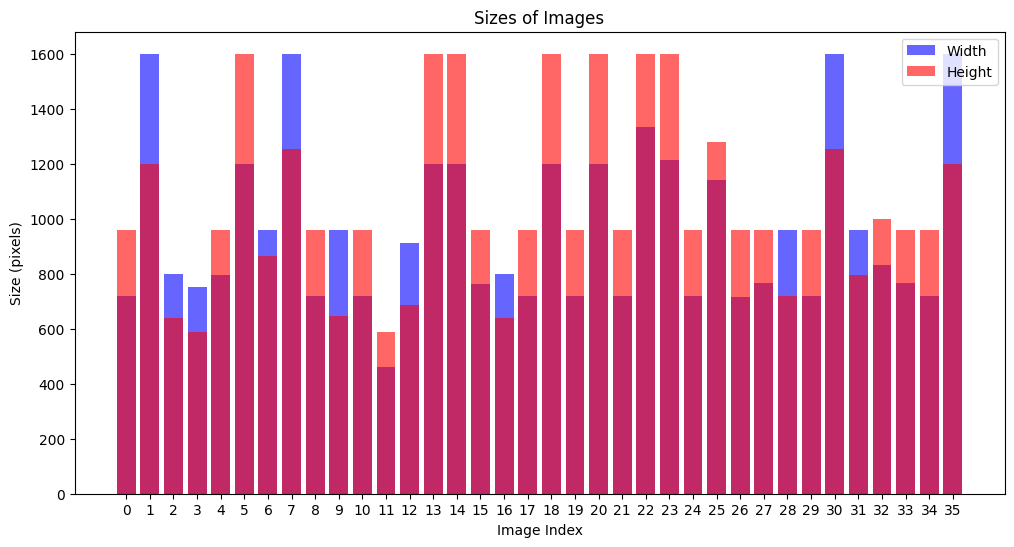

In [4]:
folder_path = 'Example_Data'
output_folder = 'Final_Data'

# Analyze images
sizes = analyze_images(folder_path)
average_size = calculate_average_size(sizes)
print(f'Average size: {average_size}')

# Plot image sizes
plot_image_sizes(sizes)

# Resize and normalize images
resize_and_normalize_images(folder_path, average_size, output_folder)
